**Data** **Preprocessing**

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [85]:
data = pd.read_excel("/unioncarbide.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


**Outliers**

In [87]:
z = np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


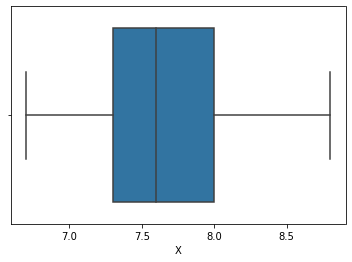

In [88]:
sns.boxplot(x=data['X'])

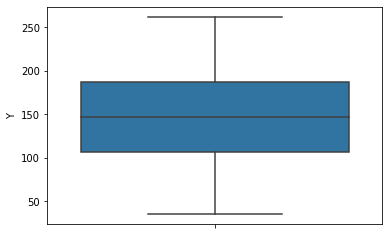

In [89]:
sns.boxplot(y=data['Y'])

In [90]:
f_data = data[(z < 3).all(axis=1)]
f_data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [91]:
df = data
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [92]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

32
32
No outliners


**Normalization**

In [93]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.428571,0.644970
1,0.190476,0.745562
2,0.714286,0.751479
3,0.380952,0.828402
4,0.333333,0.727811


Split Data

In [94]:
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [95]:
print(len(train_data))
train_data.head()

28


,X,Y
22,0.238095,0.502959
28,0.285714,0.165680
17,0.190476,0.958580
5,0.523810,0.562130
23,0.571429,0.029586


In [96]:
x = np.array(train_data['X'])
y = np.array(train_data['Y'])

**Train Data**

In [105]:
#Initialise values 
m=1.0
c=-1.0
err = []
dm=dc=1
ns=len(x)#total samples
eta=0.1 #Learning rate
max_iters=100 #Maximum iterations
def derivative(m,c,x,y):
  x_derivative=(-1.0)*(y-m*x-c)*x
  y_derivative=(-1.0)*(y-m*x-c)
  return x_derivative,y_derivative
for i in range(max_iters):
  error =0
  for j in range(ns):
    error +=  ((y[j] - (m *x[j]) - c))**2
    m1=m
    c1=c
    dm,dc=derivative(m1,c1,x[j],y[j])
    #find change in x , y
    dm=(-1.0)*eta*dm
    dc=(-1.0)*eta*dc
    #update variable 
    m = m + dm
    m = round(m, 2)
    c = c + dc
    c = round(c, 2)
    error = (1/(2*len(train_data['X'])))*(error)
    err.append(error)
  # print variable m and c
print(m, c)
print(f'minimum value obtained at m = {m} ,c ={c} for given function')

-0.42 0.7
minimum value obtained at m = -0.42 ,c =0.7 for given function


In [115]:
train_data_pred =  m*train_data['X'] + c
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root Mean Square Error for traning data (RMSE):",mse**0.5)

Mean Square Error for training data (MSE) :  0.08540951297223486
Root Mean Square Error for traning data (RMSE): 0.29224905983122484


Text(0.5, 1.0, 'predicted data vs actual data')

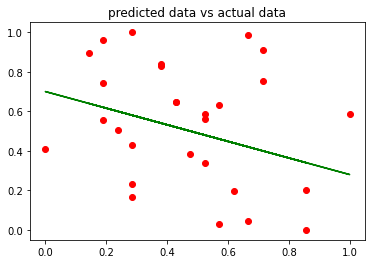

In [107]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title('predicted data vs actual data')

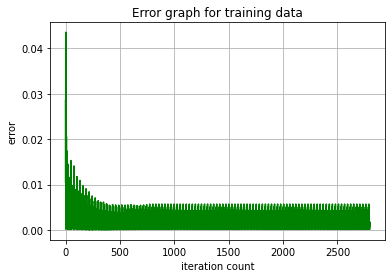

In [108]:
iters = np.arange(max_iters*len(x))
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

Test Data

In [116]:
test_data_pred = m *test_data['X'] + c
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
mse2
print("Mean Square Error for testing data (MSE) : ",mse2)
print("Root mean square error for testing data (RMSE):",mse2**0.5)

Mean Square Error for testing data (MSE) :  0.057284734428066225
Root mean square error for testing data (RMSE): 0.23934229552685882


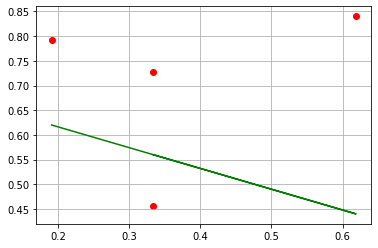

In [110]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [111]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

Predicting Output

In [114]:
x1 =x2 = float(input("enter pH value of well water :"))
x1 = (x1 - x_min)/(x_max - x_min)
y1 = m*x1 + c
y1 = y1*(y_max - y_min) + y_min
print(f"bicarbonates of well water based on its pH {x2} is : {y1}")

enter pH value of well water :7.1
bicarbonates of well water based on its pH 7.1 is : 152.78000000000003
